# Linear Model  Regression

### 1. Problem Formulation 

### 2. Collection the Data

In [5]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression 

In [8]:
data=pd.read_csv("housing.csv")

In [9]:
cal_data=data

In [10]:
cal_data.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [11]:
cal_data.tail()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND

In [12]:
cal_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [13]:
len(cal_data)

20640

In [14]:
len(cal_data.columns)

10

### 3. Exploratory Data Analysis(EDA) 

In [15]:
from sklearn.model_selection import train_test_split
train_data, test_data=train_test_split(cal_data,test_size=0.1,random_state=20)

In [16]:
print(len(train_data))

18576


In [17]:
len(test_data)

2064

In [18]:
cal_train=train_data.copy()

In [19]:
train_data.describe(include='all').transpose()

count unique        top  freq           mean  \
longitude           18576.0    NaN        NaN   NaN     -119.56753   
latitude            18576.0    NaN        NaN   NaN      35.630217   
housing_median_age  18576.0    NaN        NaN   NaN      28.661068   
total_rooms         18576.0    NaN        NaN   NaN    2631.567453   
total_bedrooms      18390.0    NaN        NaN   NaN     537.344698   
population          18576.0    NaN        NaN   NaN    1422.408376   
households          18576.0    NaN        NaN   NaN     499.277078   
median_income       18576.0    NaN        NaN   NaN       3.870053   
median_house_value  18576.0    NaN        NaN   NaN  206881.011305   
ocean_proximity       18576      5  <1H OCEAN  8231            NaN   

                              std      min       25%       50%       75%  \
longitude                2.000581  -124.35   -121.79   -118.49   -118.01   
latitude                  2.13326    32.54     33.93     34.26     37.71   
housing_median_age      12.604039      1.0      18.0      29.0      37.0   
total_rooms            2169.46745      2.0    1445.0    2127.0    3149.0   
total_bedrooms         417.672864      1.0     295.0     435.0     648.0   
population            1105.486111      3.0    785.75    1166.0    1725.0   
households             379.473497      1.0     279.0     410.0     606.0   
median_income            1.900225   0.4999    2.5643    3.5341  4.742725   
median_house_value  115237.605962  14999.0  120000.0  179800.0  264700.0   
ocean_proximity               NaN      NaN       NaN       NaN       NaN   

                         max  
longitude            -114.49  
latitude               41.95  
housing_median_age      52.0  
total_rooms          39320.0  
total_bedrooms        6445.0  
population           28566.0  
households            6082.0  
median_income        15.0001  
median_house_value  500001.0  
ocean_proximity          NaN

In [20]:
train_data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        186
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [21]:
train_data['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     8231
INLAND        5896
NEAR OCEAN    2384
NEAR BAY      2061
ISLAND           4
Name: count, dtype: int64

<Axes: xlabel='ocean_proximity', ylabel='count'>

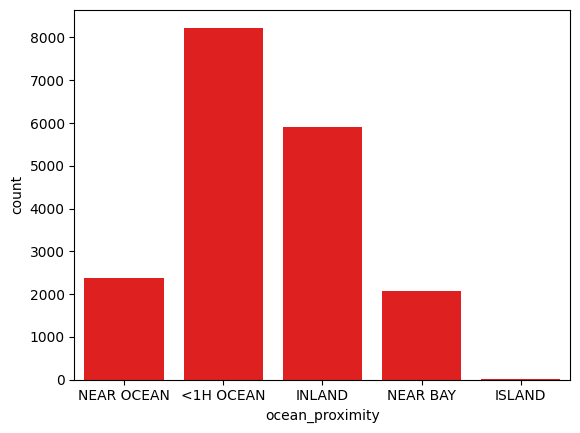

In [25]:
sns.countplot(data=train_data,x='ocean_proximity',color='red')

<Axes: xlabel='longitude', ylabel='latitude'>

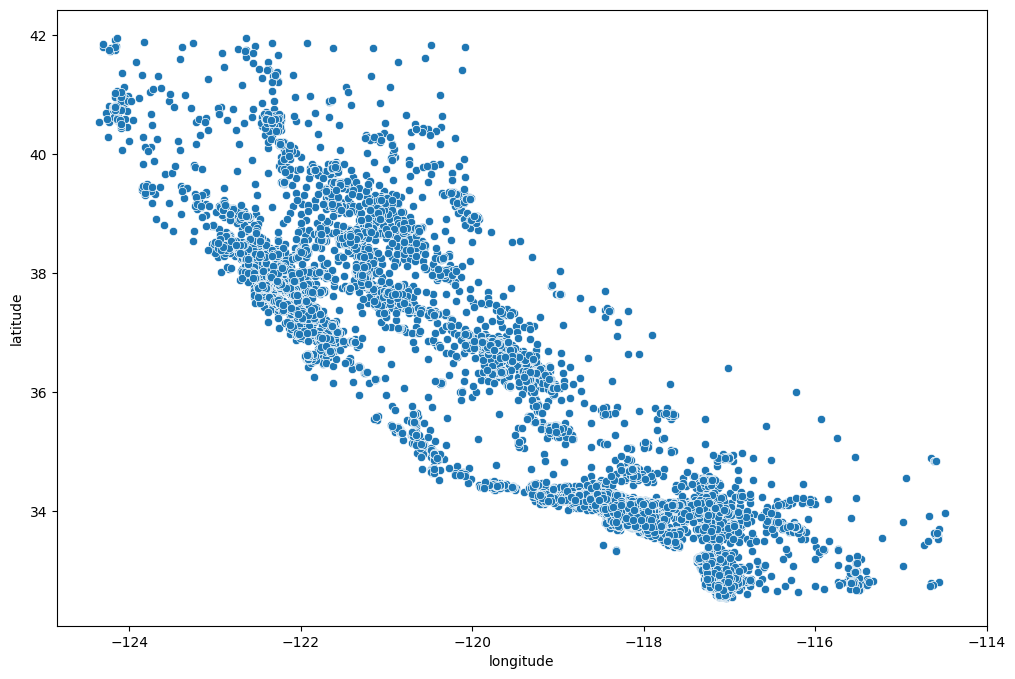

In [28]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=train_data,x='longitude',y='latitude')

<Axes: xlabel='longitude', ylabel='latitude'>

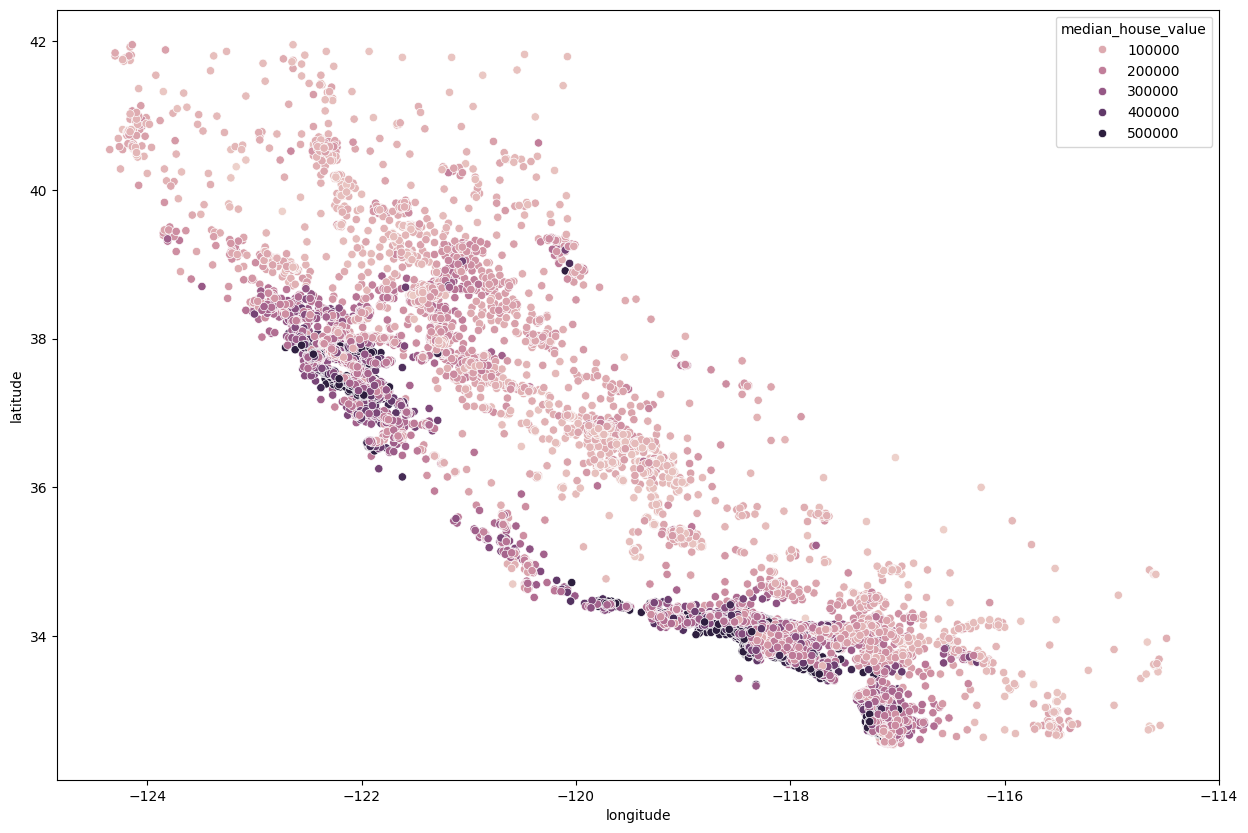

In [32]:
plt.figure(figsize=(15,10))

sns.scatterplot(data = train_data, x='longitude', y='latitude', hue='median_house_value')

<Axes: xlabel='longitude', ylabel='latitude'>

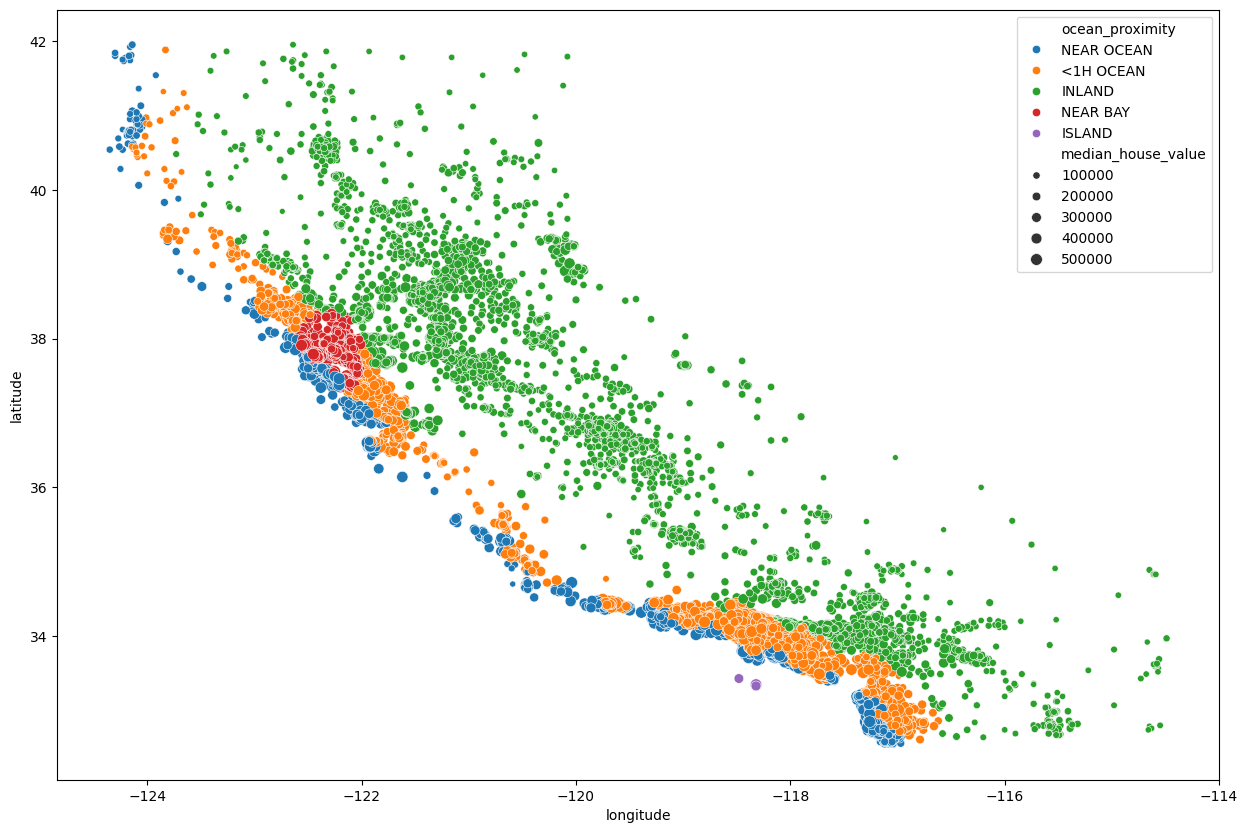

In [33]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=train_data,x='longitude',y='latitude',hue='ocean_proximity',size='median_house_value')

<Axes: xlabel='median_house_value', ylabel='median_income'>

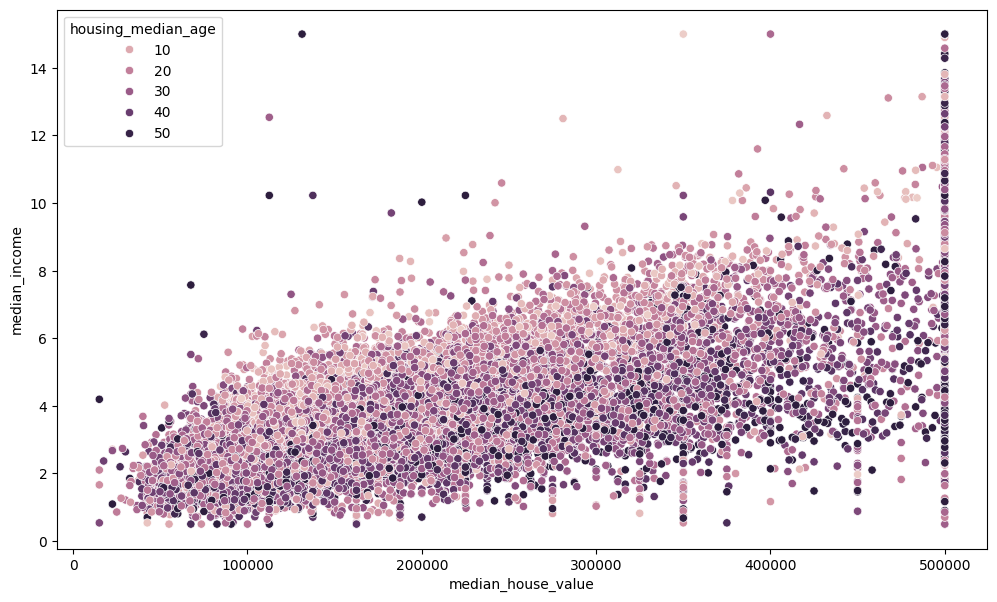

In [34]:
plt.figure(figsize=(12,7))

sns.scatterplot(data = train_data, x='median_house_value', y='median_income', hue='housing_median_age')

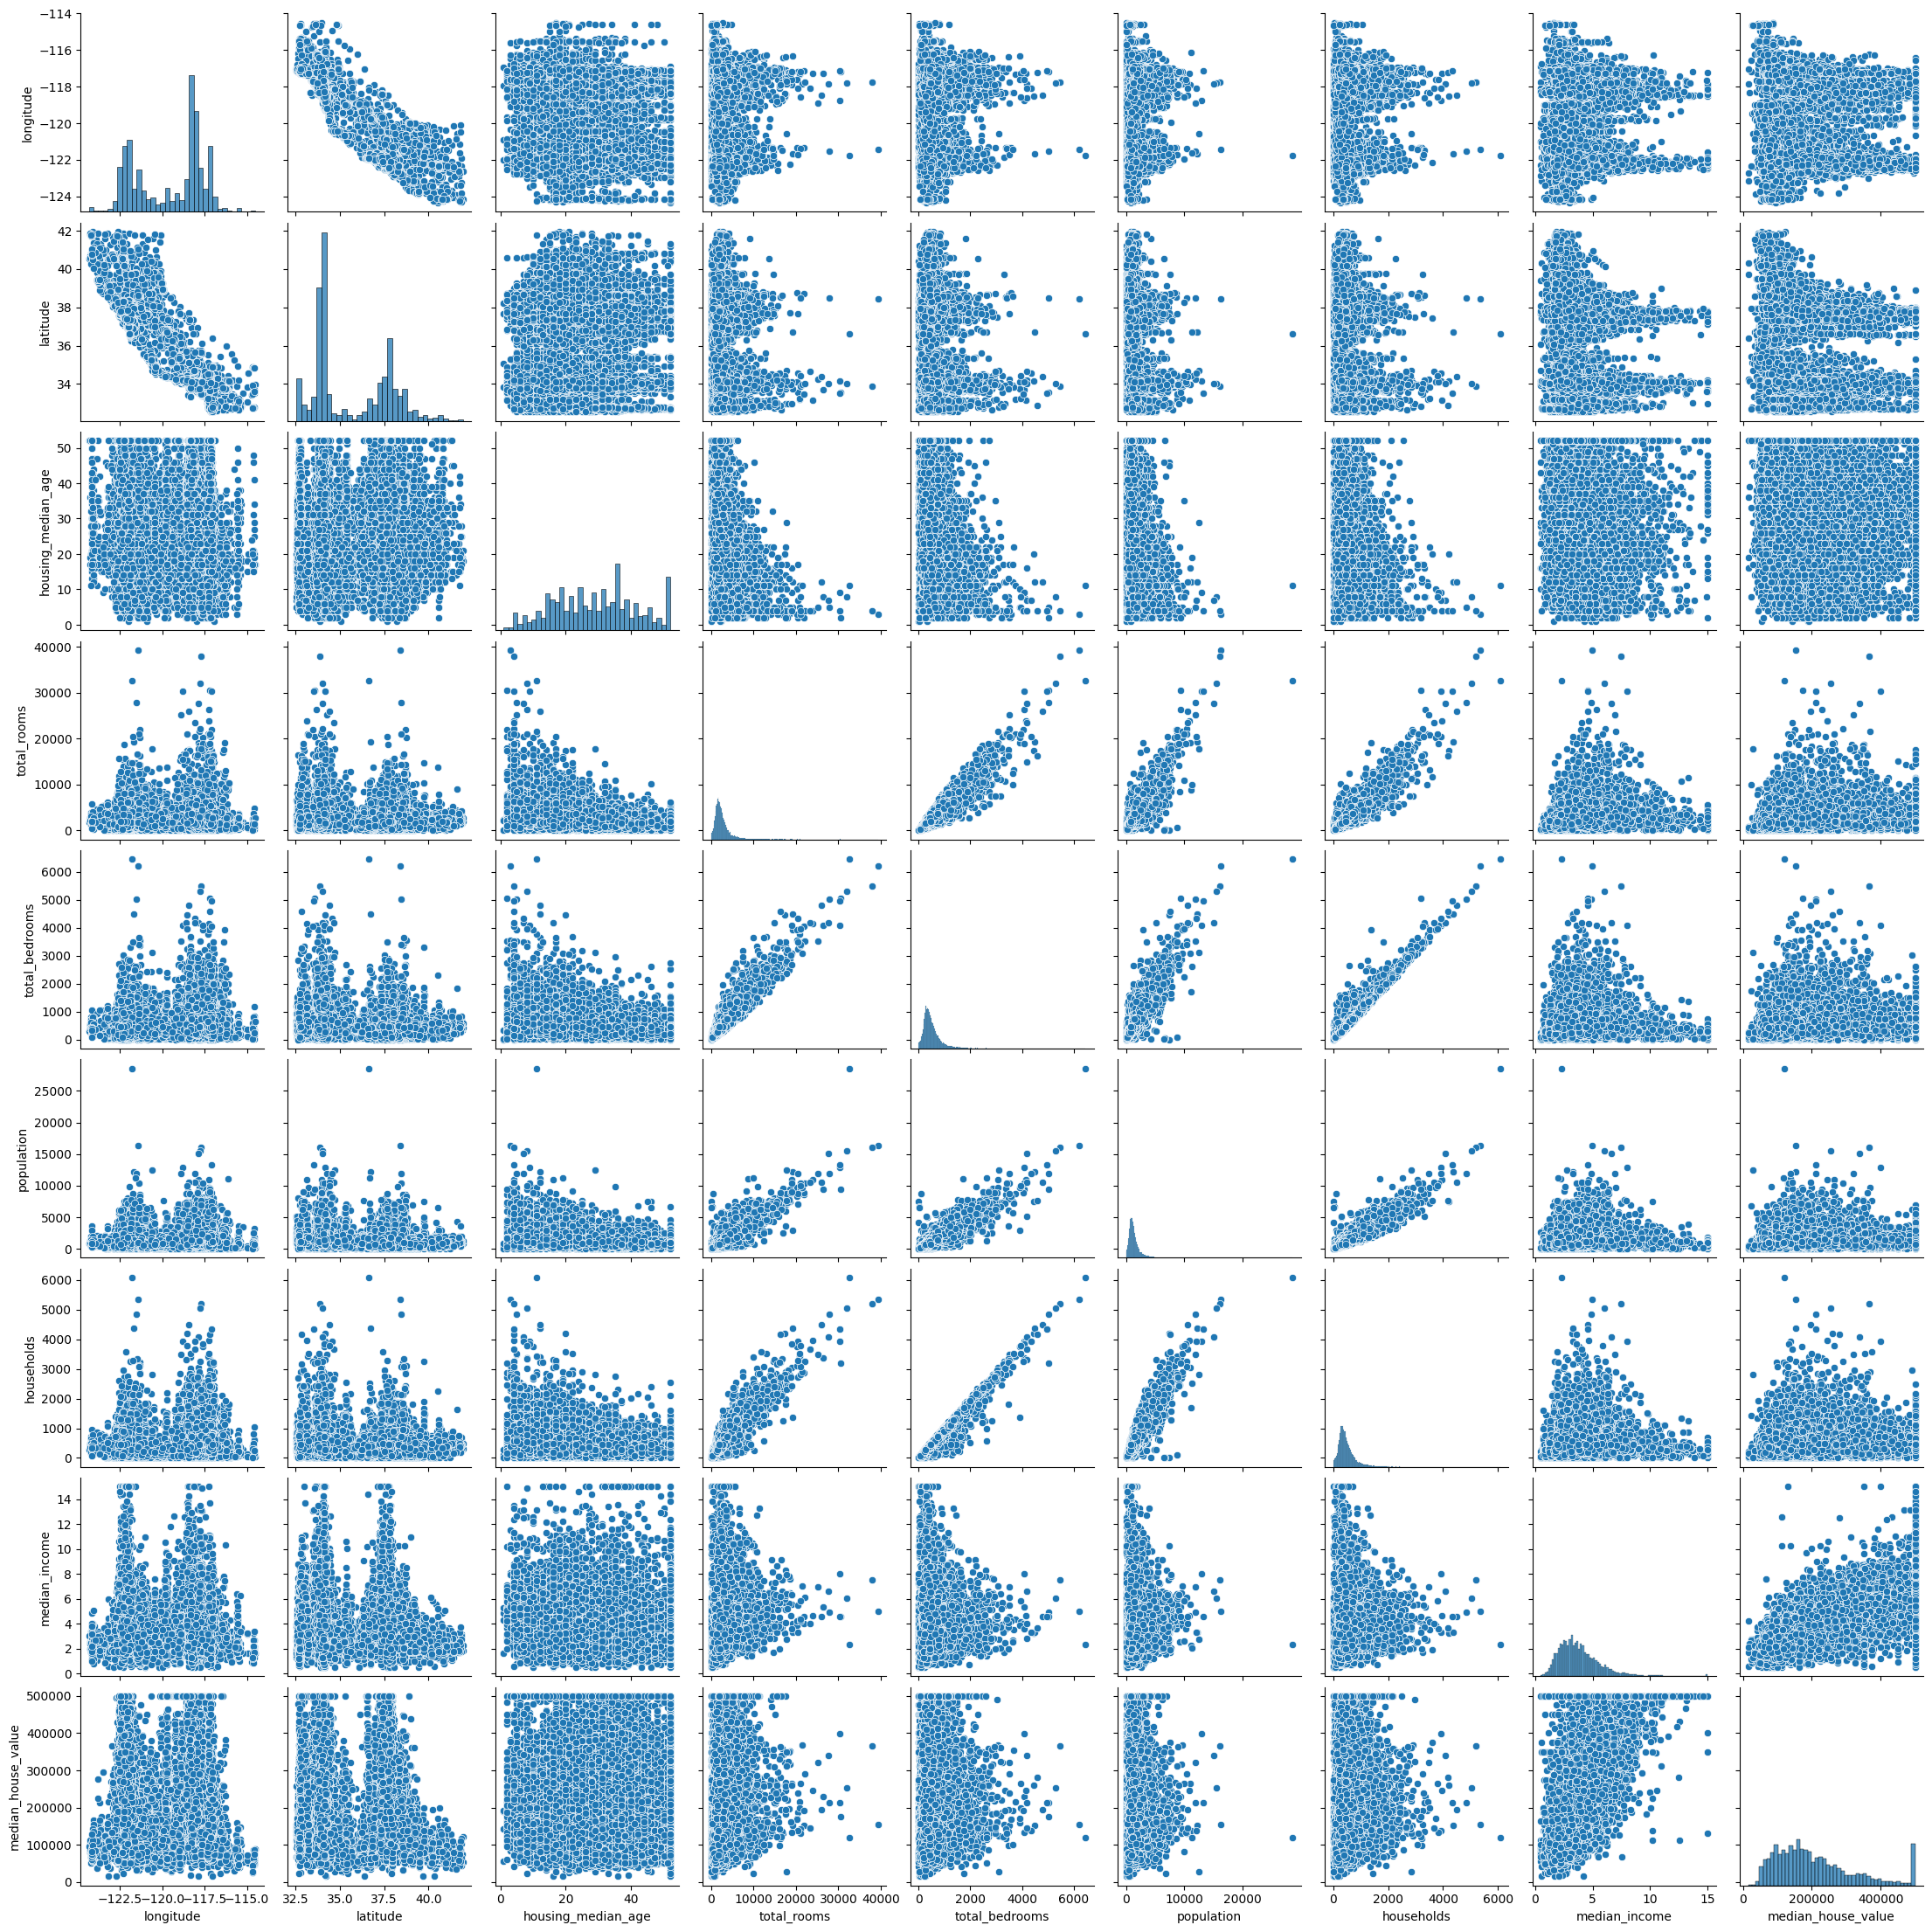

In [35]:
sns.pairplot(train_data)

### 4. Data Processing

In [37]:
training_input_data = train_data.drop('median_house_value', axis=1)
training_labels = train_data['median_house_value']

In [38]:
training_input_data.head(3)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
8101     -118.21     33.80                41.0       1251.0           279.0   
9757     -121.44     36.51                31.0       1636.0           380.0   
16837    -122.48     37.59                29.0       5889.0           959.0   

       population  households  median_income ocean_proximity  
8101       1053.0       278.0         3.2778      NEAR OCEAN  
9757       1468.0       339.0         3.2219       <1H OCEAN  
16837      2784.0       923.0         5.3991      NEAR OCEAN

In [39]:
training_labels.head()

8101     150800.0
9757     114700.0
16837    273000.0
11742    193100.0
1871     173400.0
Name: median_house_value, dtype: float64

In [40]:
from sklearn.impute import SimpleImputer

num_feats = training_input_data.drop('ocean_proximity', axis=1)

In [41]:
def handle_missing_values(input_data):
  mean_imputer = SimpleImputer(strategy='mean')
  num_feats_imputed = mean_imputer.fit_transform(input_data)
  num_feats_imputed = pd.DataFrame(num_feats_imputed, 
                            columns=input_data.columns, index=input_data.index )


  return num_feats_imputed

In [42]:
num_feats_imputed = handle_missing_values(num_feats)
num_feats_imputed.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

In [43]:
training_input_data['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     8231
INLAND        5896
NEAR OCEAN    2384
NEAR BAY      2061
ISLAND           4
Name: count, dtype: int64

In [44]:
cat_feats = training_input_data['ocean_proximity']
cat_feats.value_counts()

ocean_proximity
<1H OCEAN     8231
INLAND        5896
NEAR OCEAN    2384
NEAR BAY      2061
ISLAND           4
Name: count, dtype: int64

In [45]:
feat_map = {
      '<1H OCEAN': 0,
      'INLAND': 1,
      'NEAR OCEAN': 2,
      'NEAR BAY': 3, 
      'ISLAND': 4
}

cat_feats_encoded = cat_feats.map(feat_map)

In [46]:
cat_feats_encoded.head()

8101     2
9757     0
16837    2
11742    1
1871     1
Name: ocean_proximity, dtype: int64

In [47]:
from sklearn.preprocessing import OrdinalEncoder

def ordinary_encoder(input_data):
  
  encoder = OrdinalEncoder()
  
  output = encoder.fit_transform(input_data)

  return output

In [48]:
cat_feats_enc = label_encoder(cat_feats)
cat_feats_enc

NameError: name 'label_encoder' is not defined